# 2 Keypoint Moseq Statistics & Visuals

*Anusha Aggarwal*

Note: Their workflow primarily does a control vs. experimental comparison. Since our microcolony data is all queen-less, we only have one grouping of data, so this notebook adjusts for that. If we at some point have control (queen-right) data, the workflow from the following link can be used:

https://keypoint-moseq.readthedocs.io/en/latest/analysis.html

In [1]:
import keypoint_moseq as kpms
import os

### Setup

In [2]:
project_dir='anusha_kpms_project' # the full path to the project directory
model_name='gpu_1e5_all_data' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

### Assign Groups (optional)

Only do this if you have default and mutant video files. Otherwise, skip this and run the next section of code.

In [ ]:
kpms.interactive_group_setting(project_dir, model_name)

### If you don't assign groups, run the following:

This generates the index.csv file needed for downstream tasks. First change the intital index.csv file name. Then make run cells. See if second cell works without the first one being run.

In [3]:
import os

index_filepath = os.path.join(project_dir, "index.csv")

if not os.path.exists(index_filepath):
    kpms.generate_index(project_dir, model_name, index_filepath)

### Generate Dataframes

In [4]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,Trial2_UlqC1_060_analysis_track0,2813.552432,1086.670623,-0.637191,0.000000,0.000000,19,0,default,True
1,Trial2_UlqC1_060_analysis_track0,2812.863907,1087.132447,-0.600219,0.087998,24.871932,19,1,default,False
2,Trial2_UlqC1_060_analysis_track0,2813.333775,1086.489669,-0.408330,0.143057,23.886096,19,2,default,False
3,Trial2_UlqC1_060_analysis_track0,2812.760486,1086.752119,-0.490255,0.153772,18.915254,19,3,default,False
4,Trial2_UlqC1_060_analysis_track0,2811.781453,1086.526121,-0.563314,0.134628,30.143362,19,4,default,False
...,...,...,...,...,...,...,...,...,...,...
3527995,Trial4_UlqC1_060_analysis_track9,2229.563375,2963.460853,1.082605,0.020916,16.872081,24,71995,default,False
3527996,Trial4_UlqC1_060_analysis_track9,2230.837339,2963.589451,1.088122,0.030455,38.413145,24,71996,default,False
3527997,Trial4_UlqC1_060_analysis_track9,2230.496388,2962.636896,1.080828,0.034083,30.352058,24,71997,default,False
3527998,Trial4_UlqC1_060_analysis_track9,2230.985323,2963.181010,1.096715,0.029608,21.945520,24,71998,default,False


In [5]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df, 
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,default,Trial2_UlqC1_060_analysis_track0,0,-0.008429,1.707789,-3.137059,3.139218,0.148907,11.560515,-187.917112,188.230607,94.251245,71.720089,0.517417,1976.642454,0.083743,0.219208
1,default,Trial2_UlqC1_060_analysis_track0,1,0.142729,1.897415,-3.139974,3.137366,-0.221078,12.703561,-188.014395,187.534699,108.397981,73.418969,0.605706,441.110550,0.079691,0.145506
2,default,Trial2_UlqC1_060_analysis_track0,2,0.304362,1.790477,-3.133213,3.141183,0.044329,11.490532,-187.590005,187.462314,120.648347,89.161624,0.419368,1008.156427,0.068271,0.127758
3,default,Trial2_UlqC1_060_analysis_track0,3,0.053973,1.889395,-3.140425,3.136445,-0.114765,12.951170,-188.261123,4.661462,91.688484,58.984816,0.936674,387.419209,0.069499,0.198233
4,default,Trial2_UlqC1_060_analysis_track0,4,-0.094562,1.818180,-3.140668,3.140949,-0.004377,6.732633,-188.220655,188.016878,80.146921,53.929470,0.773517,369.366468,0.080305,0.397401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,default,Trial4_UlqC1_060_analysis_track9,25,0.302684,1.534039,-3.091127,2.785993,-0.001829,0.432861,-3.337498,3.472150,30.567050,16.848049,0.861679,120.729481,0.014354,0.958333
1437,default,Trial4_UlqC1_060_analysis_track9,26,0.383951,1.655801,-2.225178,2.015719,0.098795,0.411537,-1.341715,1.199417,55.899668,46.042975,3.320983,241.466897,0.003589,0.213889
1438,default,Trial4_UlqC1_060_analysis_track9,27,0.978366,2.419350,-3.141516,3.141469,0.062308,16.234101,-188.487233,188.481936,24.906468,13.411451,0.503953,96.866982,0.011364,2.719298
1439,default,Trial4_UlqC1_060_analysis_track9,28,0.762874,1.194861,-2.931854,3.077776,0.004094,0.430078,-3.825036,6.842309,30.231792,16.729645,0.547180,116.638160,0.018242,1.203279


In [6]:
# save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to anusha_kpms_project/gpu_1e5_all_data
Saved `stats_df` dataframe to anusha_kpms_project/gpu_1e5_all_data


### Label syllables (Optional)

In [ ]:
kpms.label_syllables(project_dir, model_name, moseq_df) 

### Compare between groups

If you only have default group data, this line of code will error, but still give you a plot.

UnboundLocalError: local variable 'syll_info_df' referenced before assignment

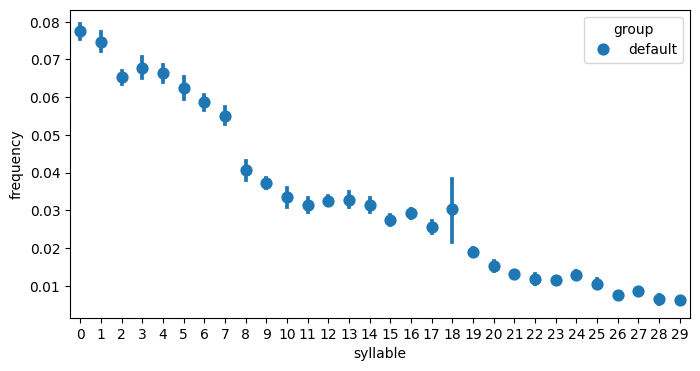

In [7]:
kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='a',   # name of the control group for statistical testing
    exp_group='b',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size    
    groups=stats_df['group'].unique(), # groups to be plotted
)

### Transition Matrices

This will completely error out if you only have default group data. However, you need to run this to get the transition graphs.

In [8]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

Group(s): default


UnboundLocalError: local variable 'syll_info_df' referenced before assignment

This will also error out for default group data, but you will still get a plot.

Saved figure to anusha_kpms_project/gpu_1e5_all_data/figures/transition_graphs.png


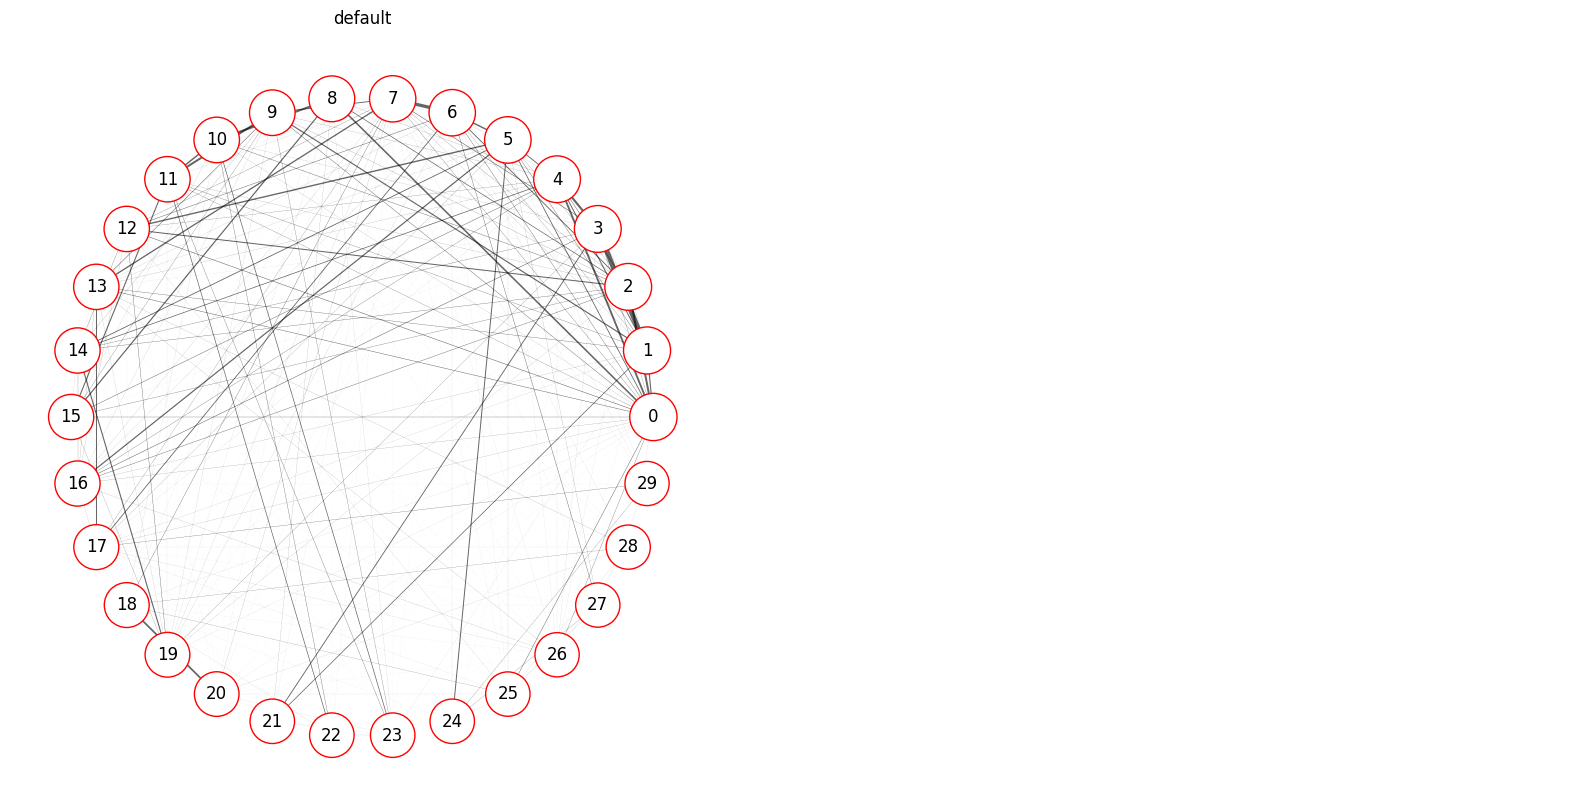

In [9]:
kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)